In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##import the data/csv file
data = pd.read_csv('/home/srija/Downloads/Compressed/Datasets/Iris.csv')

In [3]:
## deleting Iris-setosa species from Species column
data = data.drop(data[data.Species == 'Iris-setosa'].index)

In [4]:
## deleting the Columns
data = data.drop(['Id','SepalLengthCm','SepalWidthCm'],axis = 1)

In [5]:
###replacing the value of Iris-versicolor to 0 and Iris-virginica to 1
data = data.replace(to_replace = ['Iris-versicolor','Iris-virginica'],value =[0,1])

In [6]:
#Take a look at data 
data

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [7]:
versicolor = data.loc[data.Species==0]
virginica = data.loc[data.Species==1]

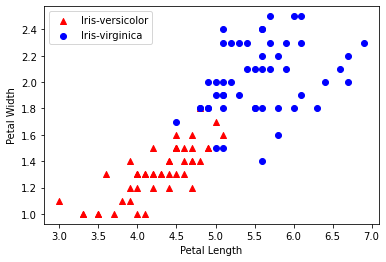

In [8]:
#Plot the dataset
plt.scatter(versicolor.iloc[:,0],versicolor.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica.iloc[:,0],virginica.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [9]:
X = data

In [10]:
#Splitting the data into training and testing samples
from sklearn.model_selection import train_test_split
a,b = train_test_split(X,random_state=0,test_size=0.2)

In [11]:
versicolor_train = a.loc[data.Species==0]
virginica_train = a.loc[data.Species==1]

In [12]:
a_x=a.iloc[:,0:2].values  ## Training samples having Features x
a_y=a.iloc[:,-1].values   ## Training samples having Target y

In [13]:
#Defining a shaping function for matrix Multiplication of x and theta
def shaping(x):
    ones = np.ones((len(x),1))
    x=np.hstack((ones,x))
    return x
##Intialising theta as zeros
theta = np.zeros([3,1])

In [14]:
#Defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
#Defining the cost function
## cost function = (1/m) * (-y*log(y)-(1-y)*log(1-y))
## h(x) = theta0 + theta1(x)
def Compute_cost(x,y,theta):
    x=shaping(x)
    h=sigmoid(x @ theta)
    cost = (1/len(x))*((-y).T @ np.log(h)-(1-y).T @ np.log((1-h)))
    return cost

In [16]:
#Defining the Gradient descent to find theta values that minimizes the cost function
## theta = theta - alpha * derivative(cost function)
## Derivative(Cost Function) = (1/m) * sigma(1->m) (h(x)-y)*x
## theta = theta - (alpha/m)* sigma(1->m) (h(x)-y)*x
def gradient_descent(x,y,theta,alpha,iterations):
    y = y.reshape(len(y),1)
    x=shaping(x)
    for i in range(iterations):
        gradient = ((1/len(x)) * x.T @ (sigmoid(x @ theta) - y))
        theta = theta - alpha * gradient
    return theta

In [17]:
#Computing Cost function for training samples
J = Compute_cost(a_x,a_y,theta)
J

array([0.69314718])

In [18]:
#Hyperparameters
alpha = 0.5
iterations = 1500


In [19]:
#Calculating theta values after running gradient-descent
weights = gradient_descent(a_x,a_y,theta,alpha,iterations)
weights

array([[-14.76789016],
       [  1.30302869],
       [  5.2104169 ]])

In [20]:
# Computing Cost Function with weights as theta values
J = Compute_cost(a_x,a_y,weights)
J

array([0.17261744])

In [21]:
##setting up the scale on x axis
x_values_train = [np.min(a_x[:, 0]-4), np.max(a_x[:, 1]+4)]
###finding values of y for corresponding x using hypothesis equation
y_values_train = - (weights[0] + weights[1]* x_values_train) / weights[2]

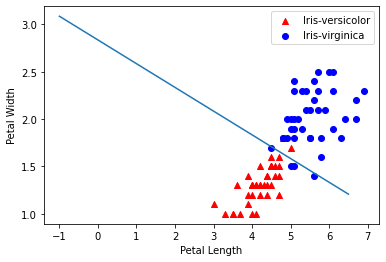

In [22]:
###plotting decision boundry for training samples
plt.scatter(versicolor_train.iloc[:,0],versicolor_train.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_train.iloc[:,0],virginica_train.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.plot(x_values_train,y_values_train)
plt.show()

In [23]:
versicolor_test = b.loc[data.Species==0]
virginica_test = b.loc[data.Species==1]

In [24]:
b_x=b.iloc[:,0:2].values  ##Testing samples having Features x
b_y=b.iloc[:,-1].values   ##Testing samples having Target y

In [25]:
## Setting up scales on x-axis
x_values_test = [np.min(b_x[:, 0]-4), np.max(b_x[:, 1]+4)]
#finding values of y for corresponding x using hypothesis equation
y_values_test = - (weights[0] + weights[1]* x_values_test) / weights[2]

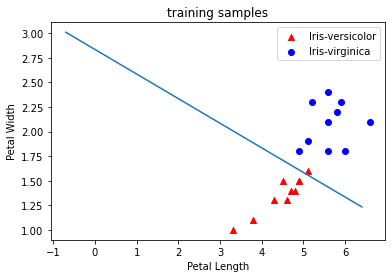

In [26]:
#plotting decision boundry for testing samples
plt.scatter(versicolor_test.iloc[:,0],versicolor_test.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_test.iloc[:,0],virginica_test.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.title('training samples')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.plot(x_values_test,y_values_test)
plt.show()

In [27]:
#Actual Values
ytest = b_y
ytest = ytest.reshape(len(ytest),1)
ytest

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [28]:
## Predicted Values
b_x = shaping(b_x)
ypred = np.round(sigmoid(b_x @ weights))
ypred

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [29]:
#comparing testing and predicted values of target variable
check = np.hstack((ytest,ypred))
df = pd.DataFrame(check,columns=['ytest','ypred'])
df

,ytest,ypred
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [30]:
### predicting y values for unseen values of x
def predict():
    x1 = float(input("Enter Petal length:"))
    x2 = float(input("Enter Petal Width : "))
    x = weights[0] + weights[1] * x1 + weights[2] * x2;
    result = np.round(sigmoid(x))
    if(result == 0):
        print("Iris-versicolor")
    else:
        print("Iris-virginica")

In [31]:
predict()

Enter Petal length:10
Enter Petal Width : 20
Iris-virginica
